In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle

from scipy.stats import gaussian_kde
import matplotlib as mpl

/home/minny/anaconda3/envs/GBLFI-final/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
params = {
   'text.usetex': False,
   'figure.figsize': [6.4, 4],
    'font.size': 9,
    'axes.labelsize': 18,
    'axes.titlesize': 18,
    'legend.fontsize':15,
    'legend.title_fontsize': 9,
    'xtick.labelsize': 13,
    'ytick.labelsize': 13,
   }

In [3]:
exp_num=1
score_name = 'es'
outputs = []
for i in [1,10,20,50,70,100,200,400]:
    with open('./sgnht_mvgk_obs-' + str(i) + '_exp-' + str(exp_num) + '_' + score_name + '.pkl', 'rb') as handle:
        outputs.append(pickle.load(handle))

trans = outputs[0]['config']['transformer']
output_samples = [trans.inverse_transform(o['samples_uncon'], use_torch=True) for o in outputs]

for o in outputs:
    print(o['config']['step_size_seq'])

[DeviceArray(0.1, dtype=float32)]
[DeviceArray(0.00316228, dtype=float32)]
[DeviceArray(0.001, dtype=float32)]
[DeviceArray(0.001, dtype=float32)]
[DeviceArray(1.e-04, dtype=float32)]
[DeviceArray(3.1622778e-05, dtype=float32)]
[DeviceArray(1.e-05, dtype=float32)]
[DeviceArray(3.1622776e-06, dtype=float32)]


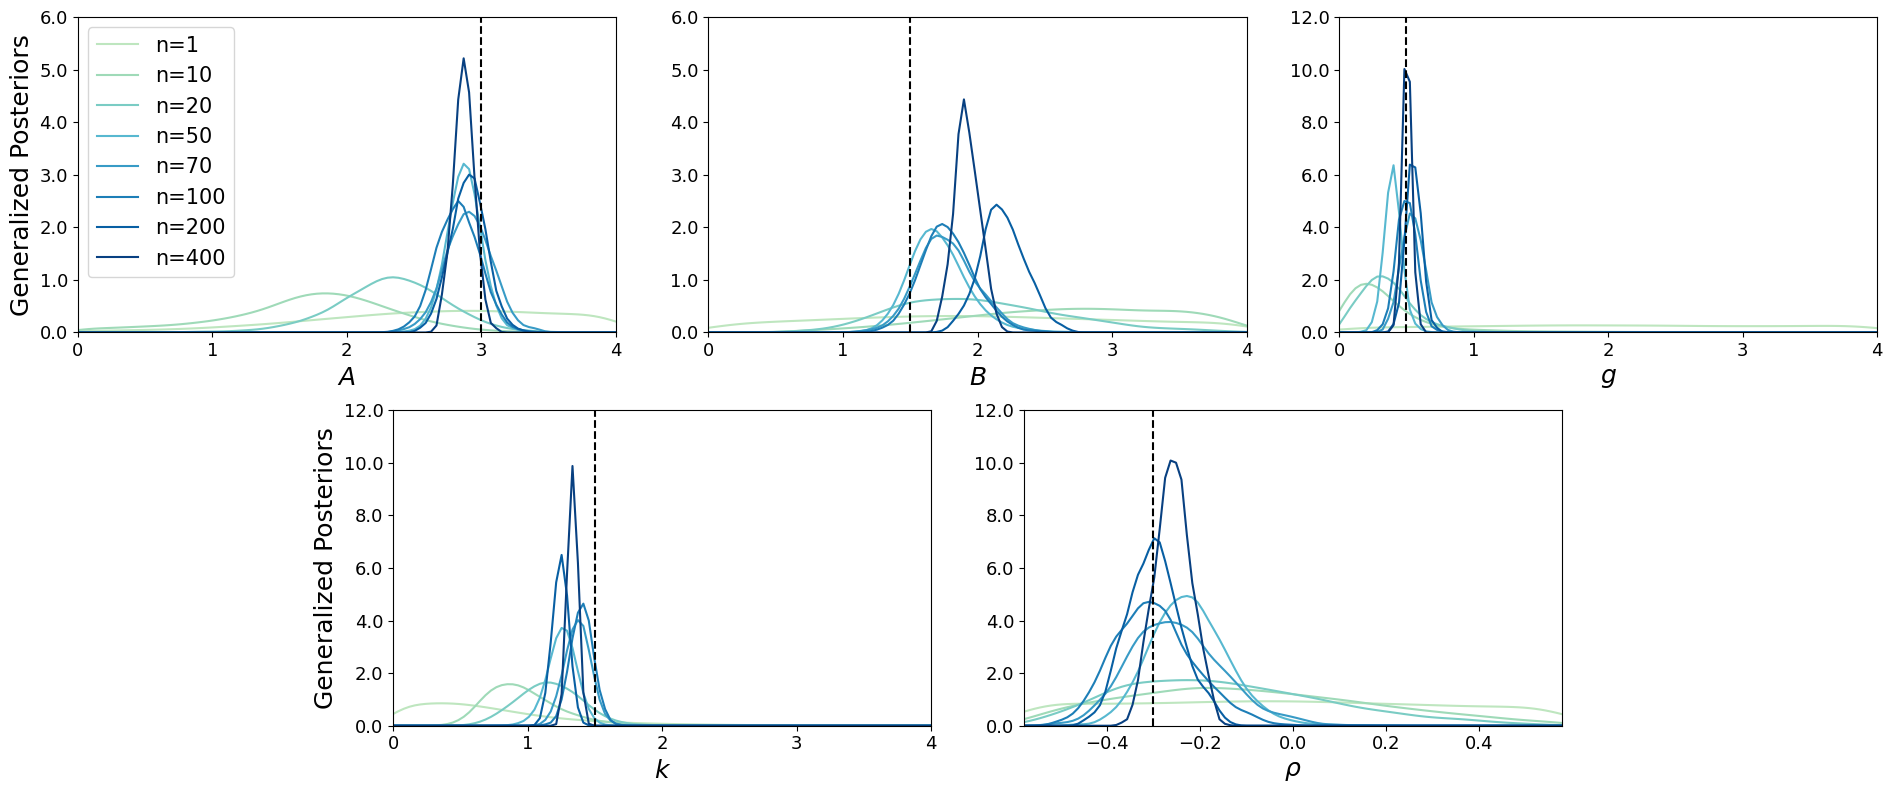

In [4]:
from matplotlib.ticker import FormatStrFormatter

y_maxes = [6,6,12,12,12]

with mpl.rc_context(params):
    smoothing = 0.2
    mid = [3.0,1.5,0.5,1.5,-0.3]
    fig = plt.figure(figsize=(19,8))

    spec = mpl.gridspec.GridSpec(ncols=6, nrows=2) # 6 columns evenly divides both 2 & 3

    ax1 = fig.add_subplot(spec[0,0:2]) # row 0 with axes spanning 2 cols on evens
    ax2 = fig.add_subplot(spec[0,2:4])
    ax3 = fig.add_subplot(spec[0,4:])
    ax4 = fig.add_subplot(spec[1,1:3]) # row 0 with axes spanning 2 cols on odds
    ax5 = fig.add_subplot(spec[1,3:5])#fig.set_size_inches(45, 10.5)
    axs = [ax1,ax2,ax3,ax4,ax5]
    xlab_leg = [r'$A$', r'$B$', r'$g$', r'$k$',r'$\rho$']
    obs_num = [1,10,20,50,70,100,200,400]
    colors = mpl.cm.GnBu(np.linspace(0.3,1,len(obs_num)))
    #fig.set_size_inches(45, 10.5)
    #fig.subplots_adjust(hspace=0.2)

    for idx, ax_idx in enumerate([(0,0),(0,1),(0,2),(1,0),(1,1)]):
        axs[idx].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        for obs_idx in range(8):
            post_samples = np.array(output_samples[obs_idx][10000:,idx].numpy())
            positions = np.linspace(0, 4, 100)
            gaussian_kernel = gaussian_kde(post_samples)
            gaussian_kernel.covariance_factor = lambda : smoothing
            gaussian_kernel._compute_covariance()

            if idx == 4:
                #/rho parameter, use different bounds
                positions = np.linspace(-0.578, 0.578, 100)
            axs[idx].plot(positions, gaussian_kernel(positions), color=colors[obs_idx], label=f"n={obs_num[obs_idx]}")

        if idx == 4:
            axs[idx].set_xlim([-0.578,.578])
        else:
            axs[idx].set_xlim([0,4])
            axs[idx].get_xaxis().set_ticks(range(0,5))
            
        axs[idx].set_ylim(ymin=0,ymax=y_maxes[idx])
        if ax_idx in [(0,0), (1,0)]:
            axs[idx].set_ylabel('Generalized Posteriors') 
        else:
            axs[idx].set_ylabel('') 

        axs[idx].set_xlabel(xlab_leg[idx])
        axs[idx].axvline(x=mid[idx], color='k', linestyle='--')
    axs[0].legend(loc='upper left')
    
    plt.tight_layout()
    plt.savefig("Marginal Posterior SG ES well-specified multivariate g-and-k concentration.pdf", bbox_inches='tight')

In [5]:
exp_num=1
score_name = 'ks'
outputs = []
for i in [1,10,20,50,70,100,200,400]:
    with open('./sgnht_mvgk_obs-' + str(i) + '_exp-' + str(exp_num) + '_' + score_name + '.pkl', 'rb') as handle:
        outputs.append(pickle.load(handle))

trans = outputs[0]['config']['transformer']
output_samples = [trans.inverse_transform(o['samples_uncon'], use_torch=True) for o in outputs]

for o in outputs:
    print(o['config']['step_size_seq'])

[DeviceArray(0.1, dtype=float32)]
[DeviceArray(0.00031623, dtype=float32)]
[DeviceArray(0.00031623, dtype=float32)]
[DeviceArray(1.e-04, dtype=float32)]
[DeviceArray(1.e-05, dtype=float32)]
[DeviceArray(3.1622776e-06, dtype=float32)]
[DeviceArray(1.e-05, dtype=float32)]
[DeviceArray(1.e-06, dtype=float32)]


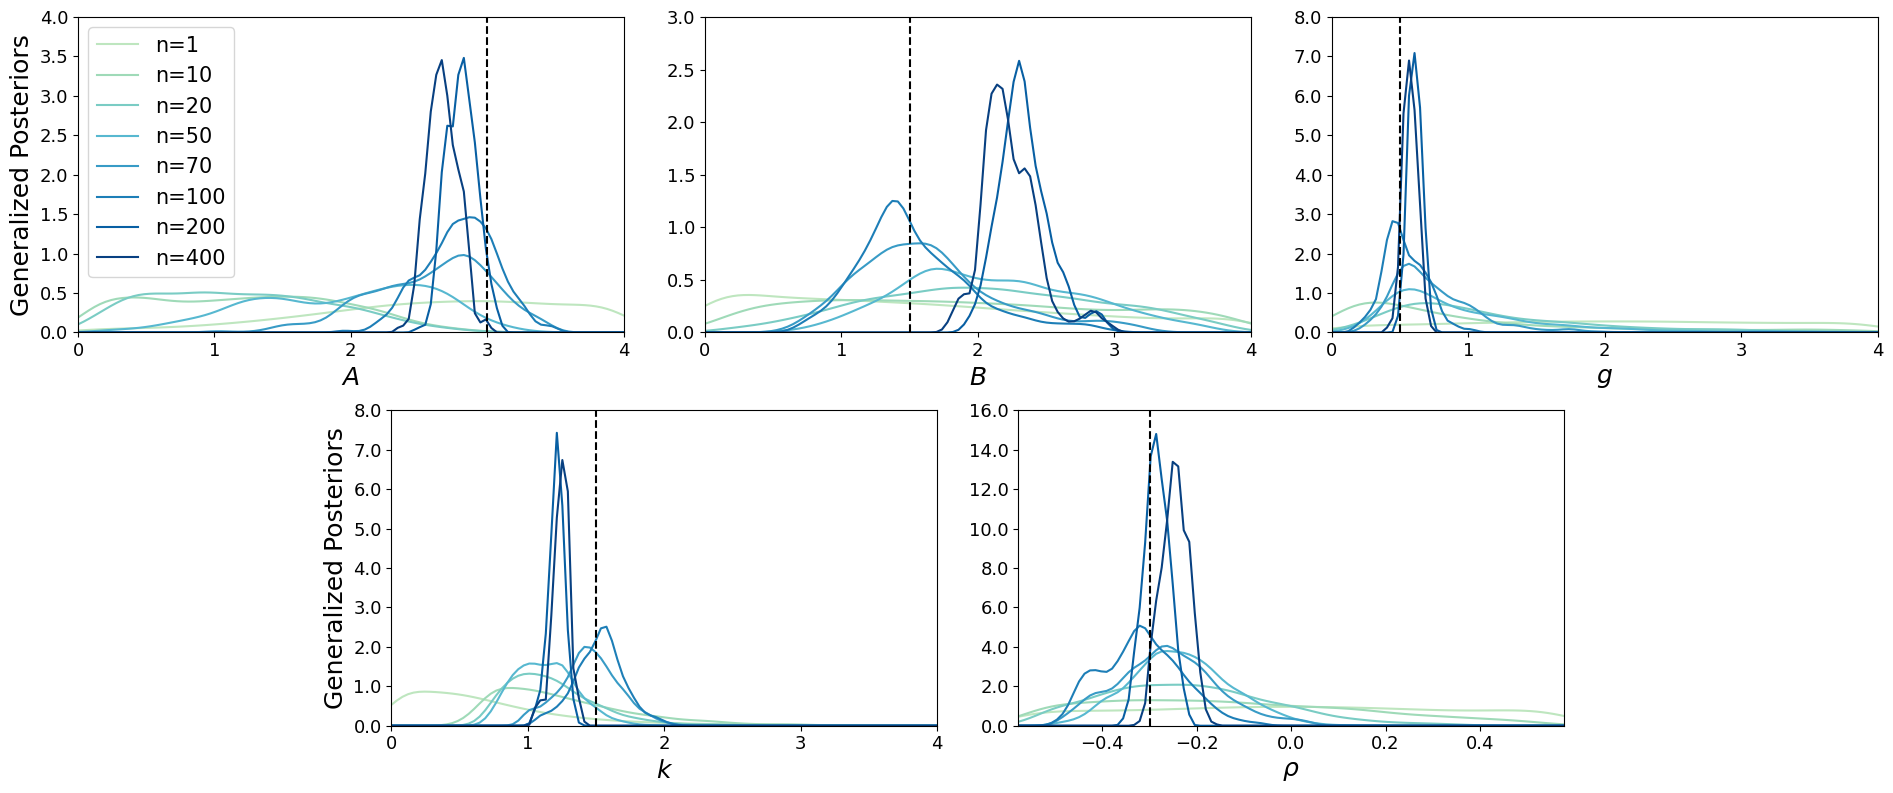

In [6]:
from matplotlib.ticker import FormatStrFormatter

y_maxes = [4,3,8,8,16]

with mpl.rc_context(params):
    smoothing = 0.2
    mid = [3.0,1.5,0.5,1.5,-0.3]
    fig = plt.figure(figsize=(19,8))

    spec = mpl.gridspec.GridSpec(ncols=6, nrows=2) # 6 columns evenly divides both 2 & 3

    ax1 = fig.add_subplot(spec[0,0:2]) # row 0 with axes spanning 2 cols on evens
    ax2 = fig.add_subplot(spec[0,2:4])
    ax3 = fig.add_subplot(spec[0,4:])
    ax4 = fig.add_subplot(spec[1,1:3]) # row 0 with axes spanning 2 cols on odds
    ax5 = fig.add_subplot(spec[1,3:5])#fig.set_size_inches(45, 10.5)
    axs = [ax1,ax2,ax3,ax4,ax5]
    xlab_leg = [r'$A$', r'$B$', r'$g$', r'$k$',r'$\rho$']
    obs_num = [1,10,20,50,70,100,200,400]
    colors = mpl.cm.GnBu(np.linspace(0.3,1,len(obs_num)))
    #fig.set_size_inches(45, 10.5)
    #fig.subplots_adjust(hspace=0.2)

    for idx, ax_idx in enumerate([(0,0),(0,1),(0,2),(1,0),(1,1)]):
        axs[idx].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        for obs_idx in range(8):
            post_samples = np.array(output_samples[obs_idx][10000:,idx].numpy())
            positions = np.linspace(0, 4, 100)
            gaussian_kernel = gaussian_kde(post_samples)
            gaussian_kernel.covariance_factor = lambda : smoothing
            gaussian_kernel._compute_covariance()

            if idx == 4:
                #/rho parameter, use different bounds
                positions = np.linspace(-0.578, 0.578, 100)
            axs[idx].plot(positions, gaussian_kernel(positions), color=colors[obs_idx], label=f"n={obs_num[obs_idx]}")

        if idx == 4:
            axs[idx].set_xlim([-0.578,.578])
        else:
            axs[idx].set_xlim([0,4])
            axs[idx].get_xaxis().set_ticks(range(0,5))
            
        axs[idx].set_ylim(ymin=0,ymax=y_maxes[idx])
        if ax_idx in [(0,0), (1,0)]:
            axs[idx].set_ylabel('Generalized Posteriors') 
        else:
            axs[idx].set_ylabel('') 

        axs[idx].set_xlabel(xlab_leg[idx])
        axs[idx].axvline(x=mid[idx], color='k', linestyle='--')
    axs[0].legend(loc='upper left')
    
    plt.tight_layout()
    plt.savefig("Marginal Posterior SG KS well-specified multivariate g-and-k concentration.pdf", bbox_inches='tight')

In [7]:
exp_num=2
score_name = 'es'
outputs = []
for i in [1,10,20,50,70,100,200,400]:
    with open('./sgnht_mvgk_obs-' + str(i) + '_exp-' + str(exp_num) + '_' + score_name + '.pkl', 'rb') as handle:
        outputs.append(pickle.load(handle))

trans = outputs[0]['config']['transformer']
output_samples = [trans.inverse_transform(o['samples_uncon'], use_torch=True) for o in outputs]

for o in outputs:
    print(o['config']['step_size_seq'])

[DeviceArray(0.1, dtype=float32)]
[DeviceArray(0.01, dtype=float32)]
[DeviceArray(0.00316228, dtype=float32)]
[DeviceArray(0.001, dtype=float32)]
[DeviceArray(0.001, dtype=float32)]
[DeviceArray(1.e-04, dtype=float32)]
[DeviceArray(1.e-04, dtype=float32)]
[DeviceArray(3.1622778e-05, dtype=float32)]


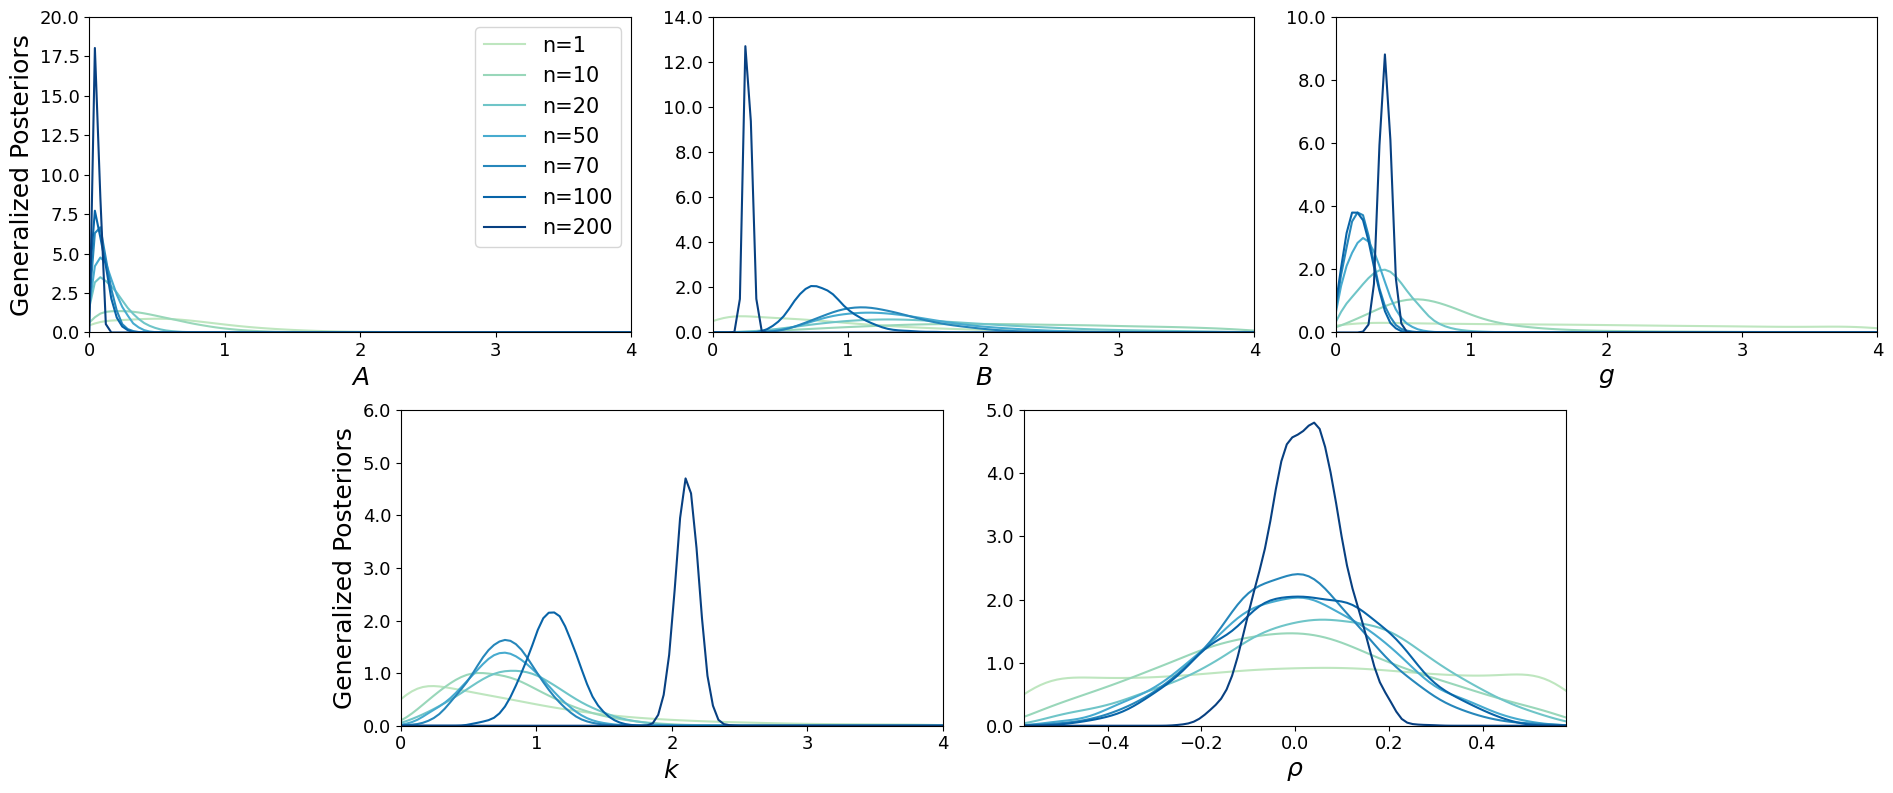

In [8]:
from matplotlib.ticker import FormatStrFormatter

y_maxes = [20,14,10,6,5]

with mpl.rc_context(params):
    smoothing = 0.2
    fig = plt.figure(figsize=(19,8))

    spec = mpl.gridspec.GridSpec(ncols=6, nrows=2) # 6 columns evenly divides both 2 & 3

    ax1 = fig.add_subplot(spec[0,0:2]) # row 0 with axes spanning 2 cols on evens
    ax2 = fig.add_subplot(spec[0,2:4])
    ax3 = fig.add_subplot(spec[0,4:])
    ax4 = fig.add_subplot(spec[1,1:3]) # row 0 with axes spanning 2 cols on odds
    ax5 = fig.add_subplot(spec[1,3:5])#fig.set_size_inches(45, 10.5)
    axs = [ax1,ax2,ax3,ax4,ax5]
    xlab_leg = [r'$A$', r'$B$', r'$g$', r'$k$',r'$\rho$']
    obs_num = [1,10,20,50,70,100,200]
    colors = mpl.cm.GnBu(np.linspace(0.3,1,len(obs_num)))
    #fig.set_size_inches(45, 10.5)
    #fig.subplots_adjust(hspace=0.2)

    for idx, ax_idx in enumerate([(0,0),(0,1),(0,2),(1,0),(1,1)]):
        axs[idx].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        for obs_idx in range(7):
            post_samples = np.array(output_samples[obs_idx][10000:,idx].numpy())
            positions = np.linspace(0, 4, 100)
            gaussian_kernel = gaussian_kde(post_samples)
            gaussian_kernel.covariance_factor = lambda : smoothing
            gaussian_kernel._compute_covariance()

            if idx == 4:
                #/rho parameter, use different bounds
                positions = np.linspace(-0.578, 0.578, 100)
            axs[idx].plot(positions, gaussian_kernel(positions), color=colors[obs_idx], label=f"n={obs_num[obs_idx]}")

        if idx == 4:
            axs[idx].set_xlim([-0.578,.578])
        else:
            axs[idx].set_xlim([0,4])
            axs[idx].get_xaxis().set_ticks(range(0,5))
            
        axs[idx].set_ylim(ymin=0,ymax=y_maxes[idx])
        if ax_idx in [(0,0), (1,0)]:
            axs[idx].set_ylabel('Generalized Posteriors') 
        else:
            axs[idx].set_ylabel('') 

        axs[idx].set_xlabel(xlab_leg[idx])
    axs[0].legend(loc='upper right')
    
    plt.tight_layout()
    plt.savefig("Marginal Posterior SG ES cauchy multivariate g-and-k concentration.pdf", bbox_inches='tight')

In [9]:
exp_num=2
score_name = 'ks'
outputs = []
for i in [1,10,20,50,70,100,200,400]:
    with open('./sgnht_mvgk_obs-' + str(i) + '_exp-' + str(exp_num) + '_' + score_name + '.pkl', 'rb') as handle:
        outputs.append(pickle.load(handle))

trans = outputs[0]['config']['transformer']
output_samples = [trans.inverse_transform(o['samples_uncon'], use_torch=True) for o in outputs]

for o in outputs:
    print(o['config']['step_size_seq'])

[DeviceArray(0.1, dtype=float32), DeviceArray(0.05, dtype=float32)]
[DeviceArray(0.01, dtype=float32)]
[DeviceArray(0.00316228, dtype=float32)]
[DeviceArray(0.00316228, dtype=float32)]
[DeviceArray(0.00316228, dtype=float32)]
[DeviceArray(0.00316228, dtype=float32)]
[DeviceArray(0.001, dtype=float32), DeviceArray(0.0005, dtype=float32), DeviceArray(0.00025, dtype=float32)]
[DeviceArray(0.001, dtype=float32), DeviceArray(0.0005, dtype=float32), DeviceArray(0.00025, dtype=float32), DeviceArray(0.000125, dtype=float32), DeviceArray(6.25e-05, dtype=float32)]


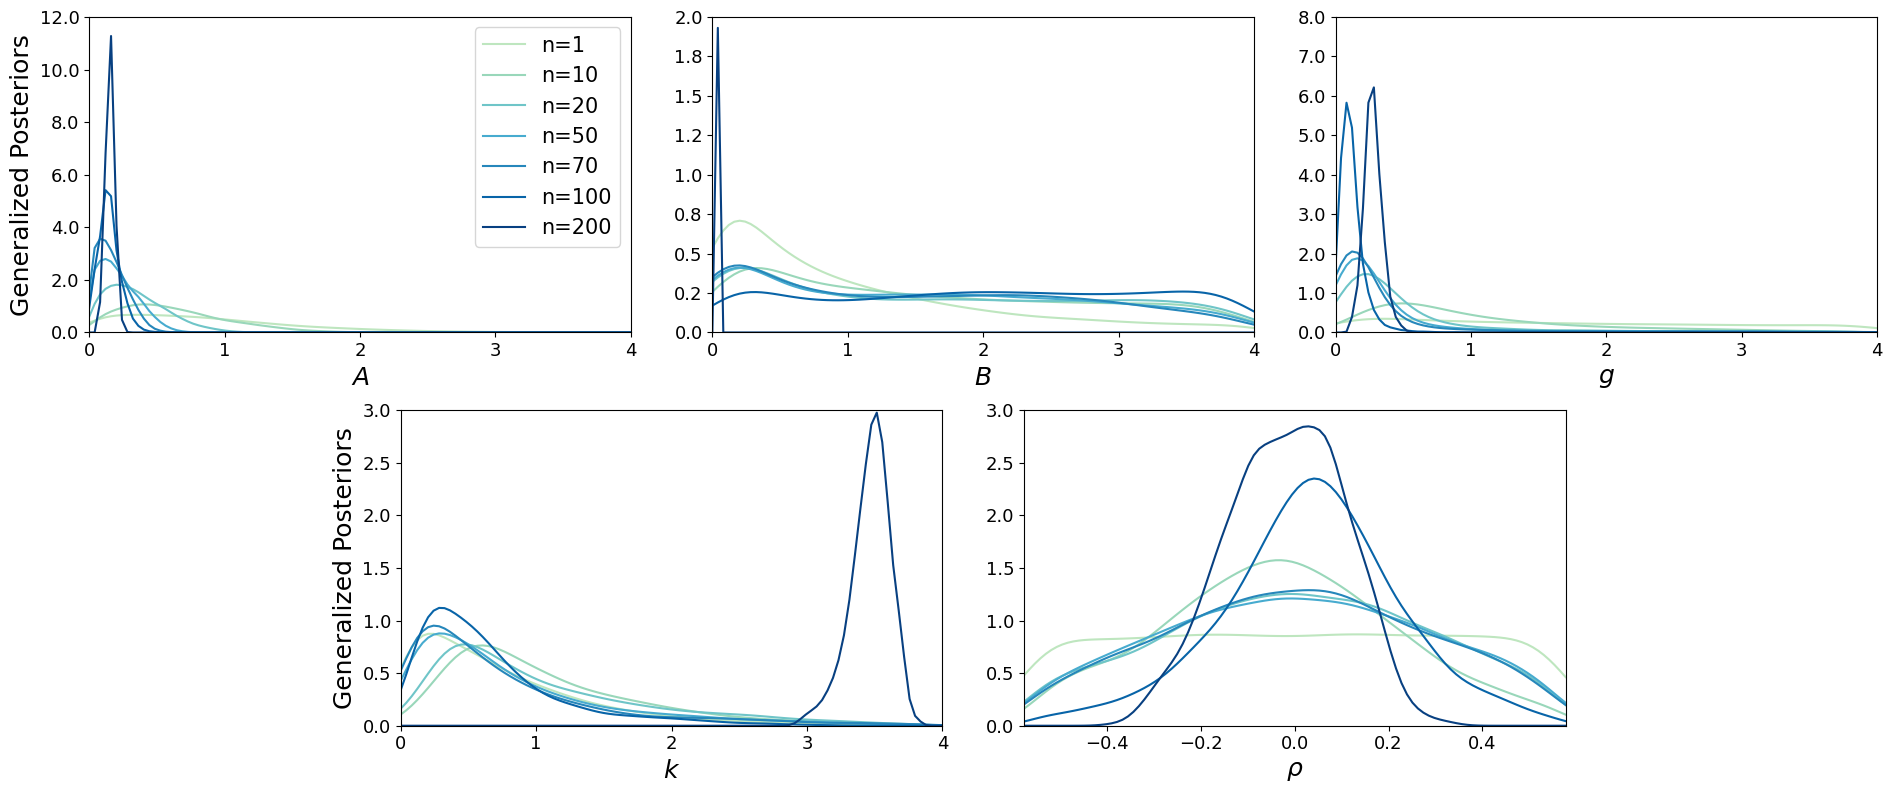

In [10]:
from matplotlib.ticker import FormatStrFormatter

y_maxes = [12,2,8,3,3]
with mpl.rc_context(params):
    smoothing = 0.2
    fig = plt.figure(figsize=(19,8))

    spec = mpl.gridspec.GridSpec(ncols=6, nrows=2) # 6 columns evenly divides both 2 & 3

    ax1 = fig.add_subplot(spec[0,0:2]) # row 0 with axes spanning 2 cols on evens
    ax2 = fig.add_subplot(spec[0,2:4])
    ax3 = fig.add_subplot(spec[0,4:])
    ax4 = fig.add_subplot(spec[1,1:3]) # row 0 with axes spanning 2 cols on odds
    ax5 = fig.add_subplot(spec[1,3:5])#fig.set_size_inches(45, 10.5)
    axs = [ax1,ax2,ax3,ax4,ax5]
    xlab_leg = [r'$A$', r'$B$', r'$g$', r'$k$',r'$\rho$']
    obs_num = [1,10,20,50,70,100,200]
    colors = mpl.cm.GnBu(np.linspace(0.3,1,len(obs_num)))
    #fig.set_size_inches(45, 10.5)
    #fig.subplots_adjust(hspace=0.2)

    for idx, ax_idx in enumerate([(0,0),(0,1),(0,2),(1,0),(1,1)]):
        axs[idx].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        for obs_idx in range(7):
            post_samples = np.array(output_samples[obs_idx][10000:,idx].numpy())
            positions = np.linspace(0, 4, 100)
            gaussian_kernel = gaussian_kde(post_samples)
            gaussian_kernel.covariance_factor = lambda : smoothing
            gaussian_kernel._compute_covariance()

            if idx == 4:
                #/rho parameter, use different bounds
                positions = np.linspace(-0.578, 0.578, 100)
            axs[idx].plot(positions, gaussian_kernel(positions), color=colors[obs_idx], label=f"n={obs_num[obs_idx]}")

        if idx == 4:
            axs[idx].set_xlim([-0.578,.578])
        else:
            axs[idx].set_xlim([0,4])
            axs[idx].get_xaxis().set_ticks(range(0,5))
            
        axs[idx].set_ylim(ymin=0,ymax=y_maxes[idx])
        if ax_idx in [(0,0), (1,0)]:
            axs[idx].set_ylabel('Generalized Posteriors') 
        else:
            axs[idx].set_ylabel('') 

        axs[idx].set_xlabel(xlab_leg[idx])
    axs[0].legend(loc='upper right')
    
    plt.tight_layout()
    plt.savefig("Marginal Posterior SG KS cauchy multivariate g-and-k concentration.pdf", bbox_inches='tight')